In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from signalUtils import addAwgn

%matplotlib inline


Text(0.5, 1.0, 'Sin')

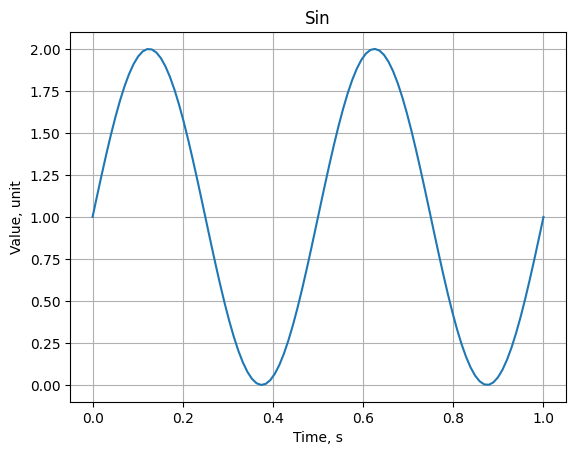

In [6]:
samplingFrequency = 100
startTime = 0
stopTime = 1

SnrValue = 20

sinFrequency = 2
sinPhase = math.radians(0)
sinAmplitude = 1
sinBias = 1

time = np.linspace(startTime, stopTime, (stopTime - startTime) * samplingFrequency)

sinArg = 2 * np.pi * sinFrequency * time + sinPhase

sinSignal = sinAmplitude * np.sin(sinArg) + sinBias

plt.plot(time, sinSignal)
plt.ylabel("Value, unit")
plt.xlabel("Time, s")
plt.grid(True)
plt.title("Sin")     

Text(0.5, 1.0, 'Sin with Noise')

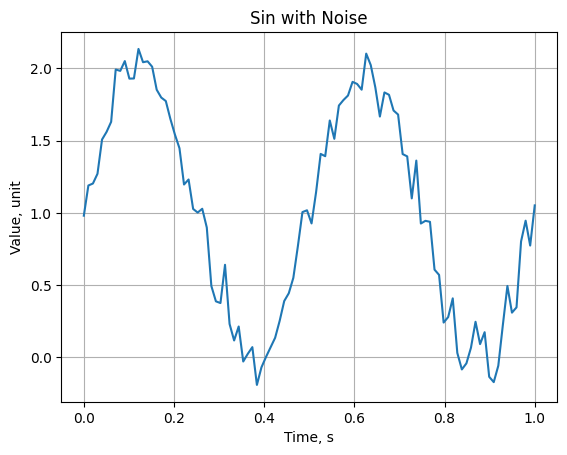

In [7]:
sinWithNoise = addAwgn(sinSignal, SnrValue)

plt.plot(time, sinWithNoise)
plt.ylabel("Value, unit")
plt.xlabel("Time, s")
plt.grid(True)
plt.title("Sin with Noise")

In [8]:
B = [0.4, 1, 0.4, 0.5]
damp = 0.01

rows = len(sinWithNoise)
Jac = np.zeros(shape=(rows, 4))
r = np.empty(rows)

for interation in range(5000) :
    
    for row in range(rows) :
        time_i = time[row]

        Jac[row,0] = np.sin(B[1] * time_i + B[2])

        Jac[row,1] = B[0] * time_i * np.cos(B[1] * time_i + B[2])

        Jac[row,2] = B[0] * np.cos(B[1] * time_i + B[2])

        Jac[row,3] = 1.0

        r[row] =  -sinWithNoise[row] +  B[0] * np.sin(B[1] * time_i + B[2]) + B[3]


    Jt = Jac.transpose()
    A = np.linalg.inv(Jt @ Jac)
    C = A @ Jt
    delta = C @ r.transpose()
    B = B - damp*delta


[-1.00269188 12.58591308 -9.43198197  0.99757255]


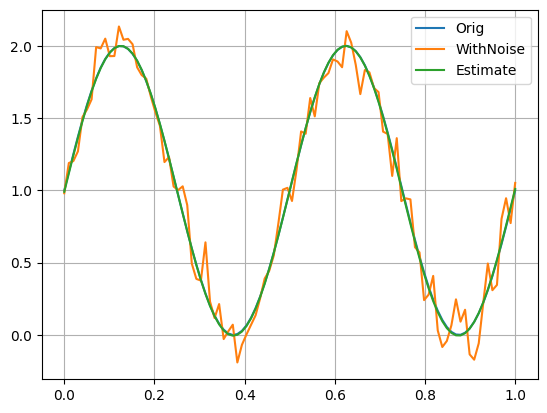

In [9]:
sinEstimateSignal = B[0] * np.sin(B[1] * time + B[2]) + B[3]

print(B)

plt.plot(time, sinSignal)
plt.plot(time, sinWithNoise)
plt.plot(time, sinEstimateSignal)
plt.grid(True)
plt.legend(["Orig", "WithNoise", "Estimate"])
plt.show()